In [54]:
# import required library

import numpy as np
import wave
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile

%matplotlib inline

warnings.filterwarnings('ignore')


In [55]:
# open and read wav files
mix_wave_1 = wave.open('ICA mix 1.wav', 'r')
mix_wave_2 = wave.open('ICA mix 2.wav', 'r')
mix_wave_3 = wave.open('ICA mix 3.wav', 'r')

In [56]:
# get parameters of wav file
mix_wave_1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [57]:
# get length of wav file in seconds
len_of_file = 264515/44100 # nframes / framerate
print(f"length of file in seconds : {len_of_file}")

length of file in seconds : 5.998072562358277


In [58]:
# extract number of frames
def extract_frames(file):
  signal_raw = file.readframes(-1)
  signal = np.fromstring(signal_raw, 'Int16')
  return signal

In [59]:
signal_1 = extract_frames(mix_wave_1)
signal_2 = extract_frames(mix_wave_2)
signal_3 = extract_frames(mix_wave_3)

In [60]:
# check length of signal_1
'''if somehow len of file is showing 0 then restart your python kernel
'''
len_of_signal_1 = len(signal_1)
print(f"length : {len_of_signal_1}") 

length : 264515


In [61]:
# get timing of signal_1
def get_timing(file, signal):
  fs = file.getframerate()
  timing = np.linspace(0, len(signal)/fs, num=len(signal))
  return timing

In [62]:
timing_1 = get_timing(mix_wave_1, signal_1)
timing_2 = get_timing(mix_wave_2, signal_2)
timing_3 = get_timing(mix_wave_3, signal_3)

In [63]:
# plot mix wave files
def plot_wave(timing, signal, title):
  plt.figure(figsize=(12 ,2))
  plt.title(title)
  plt.plot(timing, signal)
  plt.show()

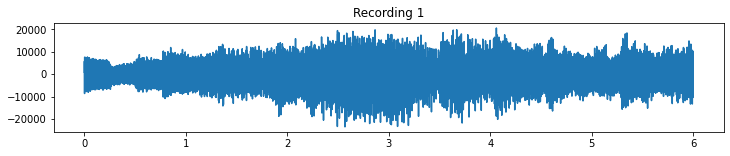

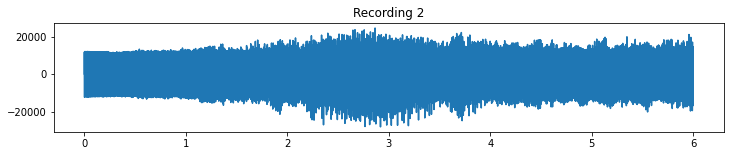

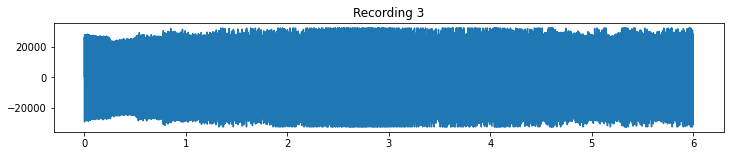

In [64]:
plot_wave(timing_1, signal_1, 'Recording 1')
plot_wave(timing_2, signal_2, "Recording 2")
plot_wave(timing_3, signal_3, 'Recording 3')

In [65]:
# zip all the signal into single list
data =  list(zip(signal_1, signal_2, signal_3))

In [66]:
# see what data looks like
data[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [67]:
# initialise FastICA and fit and transform data
fastica = FastICA(n_components=3)
ica_result = fastica.fit_transform(data)

In [68]:
# print the shape of result
ica_result.shape

(264515, 3)

In [69]:
# split signals
result_signal_1 = ica_result[:, 0]
result_signal_2 = ica_result[:, 1]
result_signal_3 = ica_result[:, 2]

In [70]:
# function to plot individual components
def plot_result_signal(result_signal, title):
  plt.figure(figsize=(12, 2))
  plt.title(title)
  plt.plot(result_signal)
  plt.ylim(-0.010, 0.010)
  plt.show()

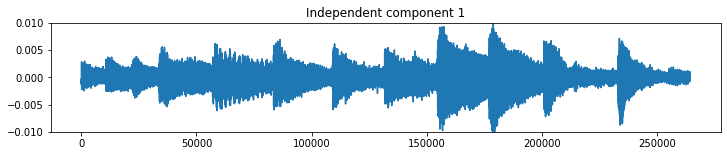

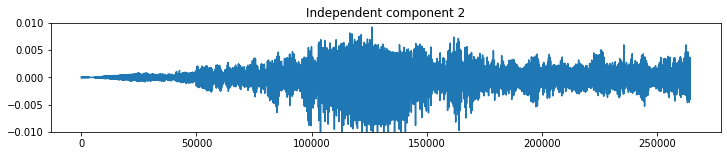

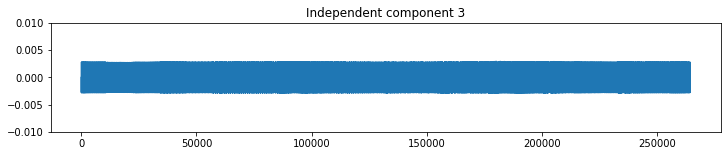

In [71]:
plot_result_signal(result_signal_1, "Independent component 1")
plot_result_signal(result_signal_2, "Independent component 2")
plot_result_signal(result_signal_3, "Independent component 3")

In [72]:
# convert signal to int16
def convert_to_int16(result_signal, fs, filename):
  result_signal_int = np.int16(result_signal * 32767 * 100)
  wavfile.write(filename, fs, result_signal_int)

In [73]:
# get framerate
fs_1 = mix_wave_1.getframerate()
fs_2 = mix_wave_2.getframerate()
fs_3 = mix_wave_3.getframerate()

# convert back to wav
convert_to_int16(result_signal_1, fs_1, "result_wav_1.wav")
convert_to_int16(result_signal_2, fs_2, "result_wav_2.wav")
convert_to_int16(result_signal_3, fs_3, "result_wav_3.wav")